<a href="https://colab.research.google.com/github/tulika1402/BAutomation/blob/main/GENERAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [13]:
import easyocr

In [14]:
reader=easyocr.Reader(['en'],gpu= True)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [15]:
import PIL
from PIL import ImageDraw

In [80]:
im=PIL.Image.open("/content/93646037.jpg")

In [81]:
bounds=reader.readtext("/content/93646037.jpg")

In [82]:
def draw_boxes(image,bounds,color="red",width=4):
  draw=ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3=bound[0]
    draw.line([*p0,*p1,*p2,*p3,*p0], fill=color, width=width)
  return image

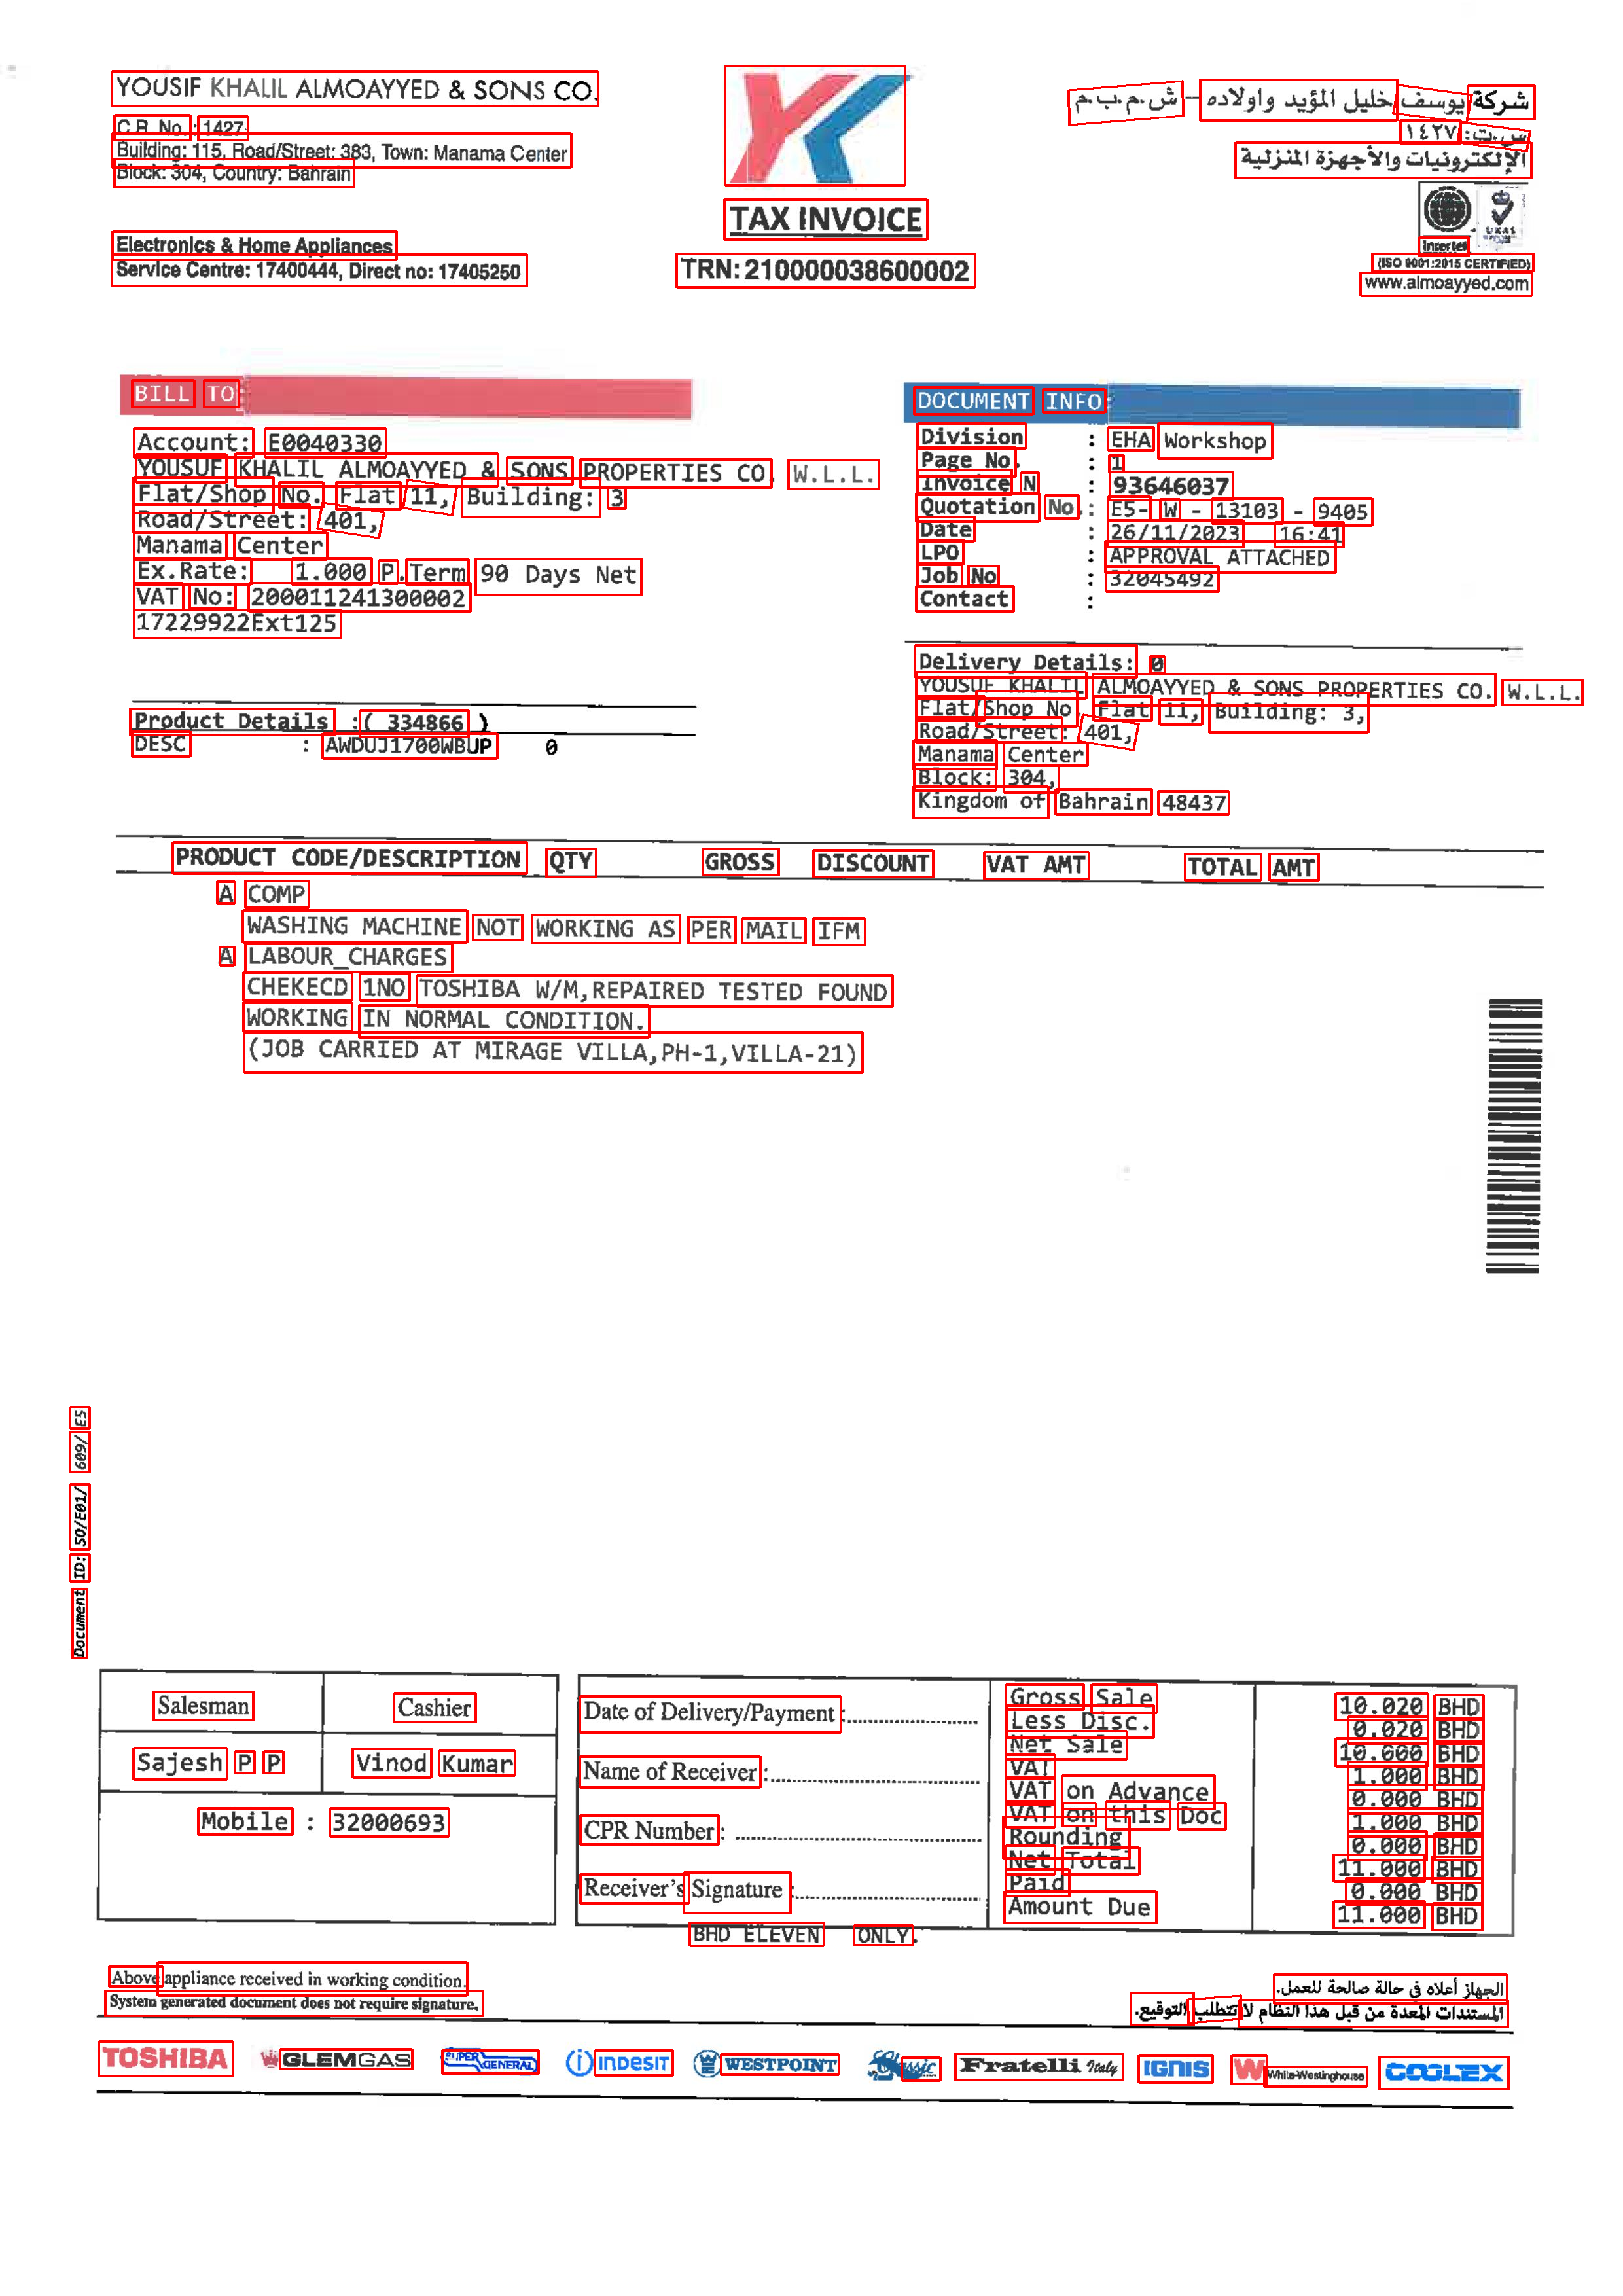

In [83]:
draw_boxes(im,bounds)

In [84]:

new_list = []  # Initialize an empty list

for i in bounds:
    if i is not None:
        new_list.append(i[1])

# Now list_data contains all the second elements from bounds
print(new_list)


['YOUSIF KHALIL ALMOAYYED & SONS CO_', 'JYglg ~Yitl Jyi', '45,&', 'CR No.', '1427', 'Y', 'Vtv', 'Building: 115, Road/Street: 383, Town: Manama Center', '14;4184+Yls oloseoyi', 'Block: 304, Country: Banrain', 'TAXINVOICE', 'Electronlcs & Home Appliances', 'Ibe', 'Servlce Centre: 17400444, Direct no: 17405250', 'TRN: 210000038600002', 'IIsO M061.2015 CerT FIEd)', 'wWW,almoayyed.com', 'BILL', 'TO;', 'DOCUMENT', 'INFO', 'Account:', 'E0040330', 'Division', 'EKA', 'Workshop', 'YOUSUF', 'KHALIL ALMOAYYED &', 'SONS', 'PROPERTIES CO_', 'W,L.L.', 'Page No', '1', 'Flat/Shop', 'No .', 'Flat', 'Building:', '3', 'Invoice', 'N', '93646037', 'Road/ Street:', 'Quotation', 'No', 'ES -', 'W', '13103', '9405', 'Date', '26/11/2023', '16:41', 'Manama', 'Center', 'Lpo', 'APPROVAL ATTACHED', 'Ex.Rate:', '1.000', 'P', 'Term', '90 Days Net', 'Job', 'No', '32045492', 'VAT', 'No:', '200011241300002', 'Contact', '17229922Ext125', 'Delivery Details:', '0', 'YOUSUF KHALIL', 'ALMOAYYED & SONS PROPERTIES CO.', 'W.L.L.

In [89]:
# Find the merged string containing "Invoice No."
import re
inv=[]
for index, item in enumerate(new_list):
    if "DOCUMENT" in item:
        # Start a new loop searching for "Invoice" starting from the index where "Document" is found
        for sub_index in range(index, len(new_list)):
            if "Invoice" in new_list[sub_index]:
                start_index = sub_index
                end_index = start_index + 4
                merged_string = ' '.join(new_list[start_index:end_index])
                # Use regular expression to find the 6-digit number till last of the number found
                #print(merged_string)
                invoice_number = re.search(r'\b\d{6,}\b', merged_string)
                if invoice_number:
                  inv.append(invoice_number.group())
                  print("Invoice Number:", invoice_number.group())
                else:
                    print("Invoice Number not found")
                break
print(inv)

Invoice Number: 93646037
['93646037']


In [86]:
# Find the merged string containing "LPO No."
import re
lpo = []
for index, item in enumerate(new_list):
    if "Document" in item:
        # Start a new loop searching for "Invoice" starting from the index where "Document" is found
        for sub_index in range(index, len(new_list)):
            if "LPO" in new_list[sub_index]:
                start_index = sub_index
                end_index = start_index + 4
                merged_string = ' '.join(new_list[start_index:end_index])
                # Use regular expression to find the 6-digit number till last of the number found

                LPO = re.search(r'\b\d{8,}\b', merged_string)
                if LPO:
                  lpo.append(LPO.group())
                  print("LPO:", LPO.group())
                else:
                    print("LPO Number not found")
                break

lpo

[]

In [87]:
vat_num = []
for index, item in enumerate(new_list):
    if "VAT" in item:
        start_index = index
        end_index = start_index + 4
        merged_string = ' '.join(new_list[start_index:end_index])
        VAT = re.search(r'\b\d{6,}\b', merged_string)
        if invoice_number:
          vat_num.append(VAT.group())
          print("VAT Number:", VAT.group())
        else:
            print("VAT Number not found")
        break
vat_num

VAT Number: 200011241300002


['200011241300002']

In [88]:
amt = []
for index, item in enumerate(new_list):
    if "TOTAL" in item:
        # Start a new loop searching for the quantity starting from the index where "TOTAL AMT" is found
        for sub_index in range(index, len(new_list)):
            # Use regular expression to find the quantity in the format "1.0"
            qty_match = re.search(r'\b\d+\.\d+\b', new_list[sub_index])
            index = sub_index + 5
            if qty_match:
              amt.append(new_list[index])
              print("TOTAL Amount :",new_list[index])
              break
amt

TOTAL Amount : Net Sale


['Net Sale']

In [90]:
vat = []
for index, item in enumerate(new_list):
    if "TOTAL" in item:
        # Start a new loop searching for the quantity starting from the index where "VAT AMT" is found
        for sub_index in range(index, len(new_list)):
            # Use regular expression to find the quantity in the format "1.0"
            qty_match = re.search(r'\b\d+\.\d+\b', new_list[sub_index])
            index = sub_index + 4
            if qty_match:
              vat.append(new_list[index])
              print("VAT Amount :",new_list[index])
              break

vat

VAT Amount : BHD


['BHD']

In [91]:
#name
pattern = r'[A-Z]+\s+[A-Z]+\s+[A-Z]+\s&+\s+[A-Z]+\s[A-Z]+. '

name_list1= []

# Iterate over each element in list_data
for item in list_data:
    # Find all matches of the pattern in the current item
    name = re.findall(pattern, item)
    # Extend the date_list with the found dates
    name_list1.extend(name)

print(name_list1)

['YOUSUF KHALIL ALMOAYYED & SONS PROPERTIES ']


In [92]:

#date

import re

pattern = r'\d{2}/\d{2}/\d{4}'
date_list = []

# Iterate over each element in list_data
for item in list_data:
    # Find all matches of the pattern in the current item
    dates = re.findall(pattern, item)
    # Extend the date_list with the found dates
    date_list.extend(dates)

print("date",date_list)


date ['09/09/2023']


In [79]:
# Assuming you have the previously defined lists: date_list, name_list, etc.

data = {
    "Date": date_list,
    "Name": name_list1,
    "Invoice No": inv,
    "LPO No": lpo,
    "VAT Amount": vat,
    "Total Amount": amt,
    "VAT Number": vat_num
}

# Get the maximum length of any list in the dictionary
max_length = max(len(value) for value in data.values())

# Fill empty lists with an appropriate value (e.g., None) to ensure equal length
for key, value in data.items():
    data[key] = value + [None] * (max_length - len(value))

# Create DataFrame using dictionary comprehension
df = pd.DataFrame(data)

# Display DataFrame
print(df)


         Date                                        Name Invoice No  \
0  09/09/2023  YOUSUF KHALIL ALMOAYYED & SONS PROPERTIES    91906378   

       LPO No VAT Amount Total Amount       VAT Number  
0  1195176247     10.363      113.999  210000038600002  
